# Project: TV Sales Analysis

Given data contains Jan-2014 to Aug-2016 daily TV sales quantity. There are total 124 Models. This data is collected from one of the leading brand of Bangladesh. Annually there are two big festivals (EID) which follows Islamic lunar calendar.
provided data are in csv format. it contains only three columns. (source: Kaggle)

## 1. Import Libraries and Loading The Dataset

In [1]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
%matplotlib inline


In [2]:
# Loading the dataset from github

df = pd.read_csv("https://raw.githubusercontent.com/merlijn8686/tvsalesforecast/main/Date%20and%20model%20wise%20sale.csv")
df.head()

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57


So we see there are 3 columns. <br>
Date: Which is the date of the TV sales.<br>
Model: The TV model that is sold. From metadata we know this goes from M1 until M124. <br>
Count: The number of that model sold on that day. 

## 2. Data Exploration

In [3]:
df.describe()

,Count
count,46116.000000
mean,96.690108
std,315.065946
min,1.000000
25%,3.000000
50%,14.000000
75%,67.000000
max,6678.000000


#### Missings

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    46116 non-null  object
 1   Model   46116 non-null  object
 2   Count   46116 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


There is no missing data...

## 3. Research Questions

<ol>
    <li>Which TV is sold the most?</li>
    <li>On which month are most of the TV's sold?</li>
    <li>On which day of the month are most TV's sold?</li>
    <li>On which day of the week are most TV's sold?</li>
    <li>What's the influence on sales when a new TV model is coming out?</li>
</ol> 

## 4. Research Question 1: Which TV is sold the most?

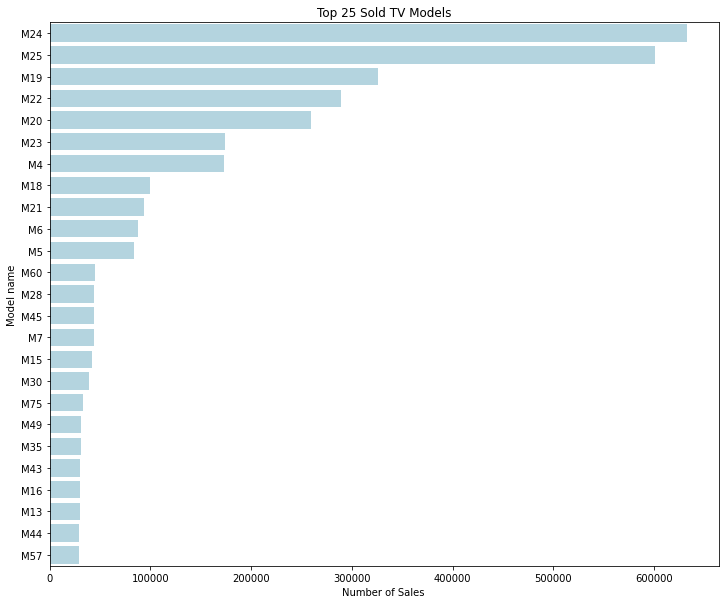

In [5]:
# First we group by model and take the sum of 'Count' and sort the values.
top25 = df.groupby('Model').Count.sum().sort_values(ascending = False).head(25)

# Now we will plot the data and see which model sold the most.
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(x = top25, y = top25.index, orient='h', color='lightblue')
ax.set(title='Top 25 Sold TV Models', xlabel='Number of Sales ', ylabel='Model name')
plt.show()

We see that in the time period of the dataset TV-model 24 was sold the most.

## 5. Research Question 2: On which month are most of the TV's sold?

To answer this question we need to change the date column in 3 seperate columns (day, month, year).

In [6]:
df['Date']=pd.to_datetime(df['Date'])

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df.head()

,Date,Model,Count,day,month,year
0,2016-08-31,M45,5,31,8,2016
1,2016-08-31,M121,3,31,8,2016
2,2016-08-31,M122,4,31,8,2016
3,2016-08-31,M91,10,31,8,2016
4,2016-08-31,M66,57,31,8,2016


We need to keep in mind that this dataset is spread out over 2.5 years. So to simply sum up the number of TV's sold per month is not possible. Let's split the data in years.

In [7]:
df2014 = df[df["Date"].dt.year == 2014]
df2015 = df[df["Date"].dt.year == 2015]
df2016 = df[df["Date"].dt.year == 2016]

<AxesSubplot:title={'center':' Total Sales per month in 2014'}, xlabel='month', ylabel='Number of Sales'>

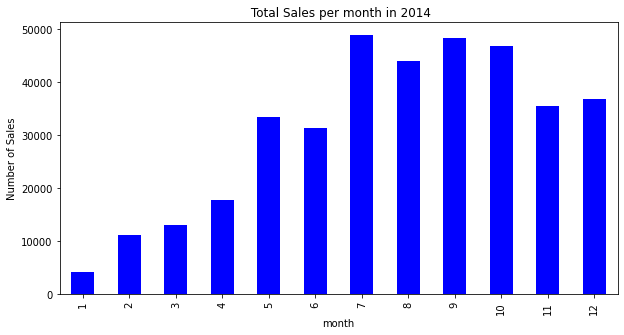

In [8]:
plt.figure(figsize=(10,5))
plt.title(' Total Sales per month in 2014')
plt.ylabel('Number of Sales')
df2014.groupby('month').Count.sum().plot(kind='bar',color='blue')

<AxesSubplot:title={'center':' Total Sales per month in 2015'}, xlabel='month', ylabel='Number of Sales'>

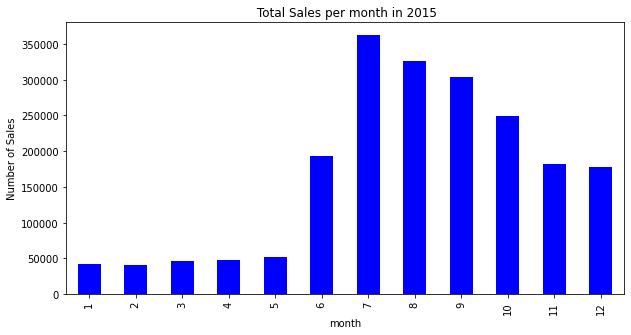

In [9]:
plt.figure(figsize=(10,5))
plt.title(' Total Sales per month in 2015')
plt.ylabel('Number of Sales')
df2015.groupby('month').Count.sum().plot(kind='bar',color='blue')

<AxesSubplot:title={'center':' Total Sales per month in 2016'}, xlabel='month', ylabel='Number of Sales'>

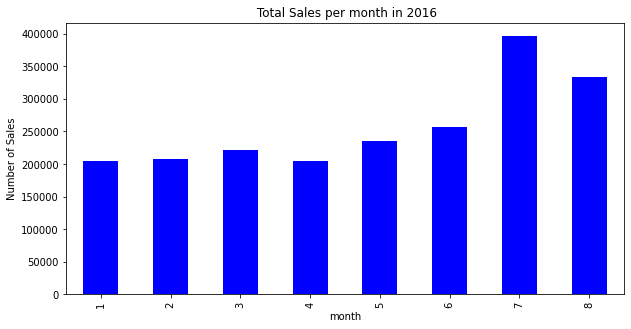

In [10]:
plt.figure(figsize=(10,5))
plt.title(' Total Sales per month in 2016')
plt.ylabel('Number of Sales')
df2016.groupby('month').Count.sum().plot(kind='bar',color='blue')

We see that every year most TV's are sold in July. Also August, September and October are good months to sell TV's. <br>
The least TV's were sold at the beginning of the year.

## 6. Research Question 3: On which day of the month are most of the TV's sold?

Since we already have a column with day of the month, we don't need to create an extra column to answer this question.

<AxesSubplot:title={'center':' Total Sales per day of the month'}, xlabel='day', ylabel='Number of Sales'>

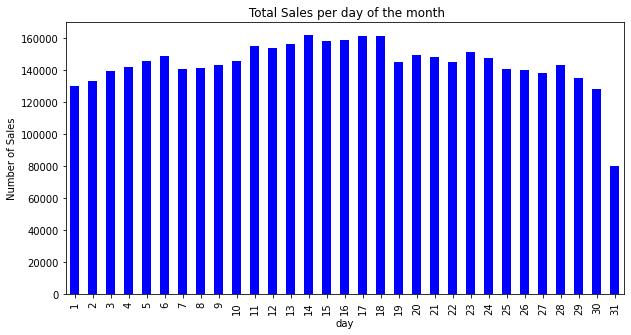

In [11]:
plt.figure(figsize=(10,5))
plt.title(' Total Sales per day of the month')
plt.ylabel('Number of Sales')
df.groupby('day').Count.sum().plot(kind='bar',color='blue')

We see that most TV's were sold in the middle of the month. <br>
On the last day of the month the least TV's were sold, but this is because not every month has 31 days. <br>


## 7. Research Question 4:On which day of the month are most of the TV's sold?

To answer the question which day of the week most TV's are sold, we first need to transform 'Date' into 'Weekday'

In [12]:
df['weekday'] = df['Date'].dt.dayofweek

In [13]:
df.head()

,Date,Model,Count,day,month,year,weekday
0,2016-08-31,M45,5,31,8,2016,2
1,2016-08-31,M121,3,31,8,2016,2
2,2016-08-31,M122,4,31,8,2016,2
3,2016-08-31,M91,10,31,8,2016,2
4,2016-08-31,M66,57,31,8,2016,2


[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

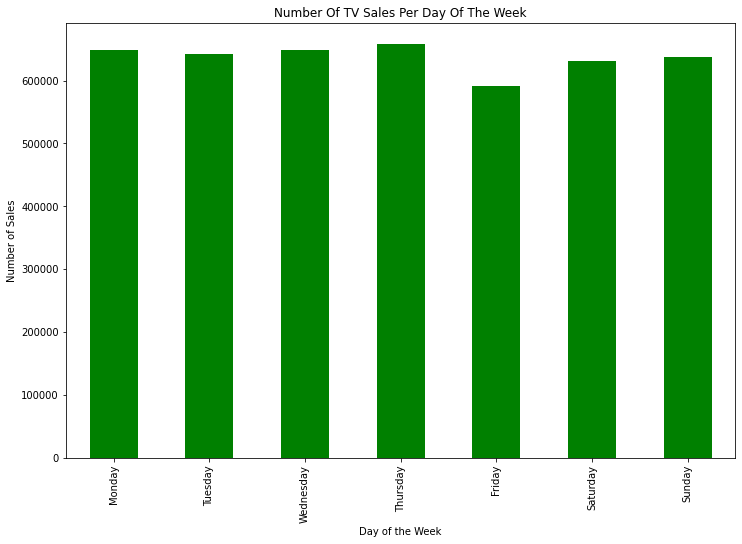

In [14]:
x_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 8))
ax = df.groupby('weekday').Count.sum().plot(kind='bar',color='green')
ax.set_title('Number Of TV Sales Per Day Of The Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Sales')
ax.set_xticklabels(x_labels)


We see that most TV's are sold on Thursday, followed by Monday.
The least TV's are sold on Friday.

## 8. Research Question 5: What's the influence on sales when a new TV model is coming out?

To answer this question we will use the six most popular TV's. 

In [15]:
# First we select the six most popular TV's.
popular_tv = df.groupby('Model').Count.sum().sort_values(ascending = False).head(6)

# Then we get the dataframe with only the six most popular TV's.
top6 = df.loc[df['Model'].isin(popular_tv.index.tolist())]

# Let's see if we only have the six most popular TV's. 
top6.Model.unique()

array(['M22', 'M23', 'M24', 'M25', 'M20', 'M19'], dtype=object)

Now we will do some more exploration and plot the models individually. 

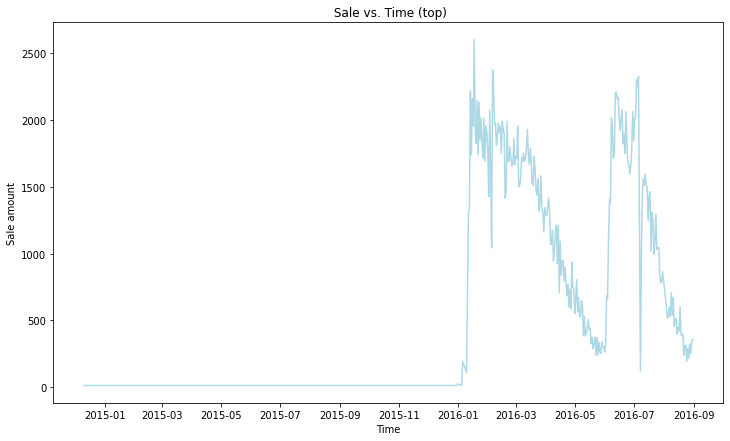

In [16]:
plt.figure(figsize=(12,7))
plt.title(' Sale vs. Time (top)')
plt.ylabel('Sale amount')
plt.xlabel('Time')
plt.plot(pd.to_datetime(top6[top6.Model == 'M22']['Date']),top6[top6.Model == 'M22']['Count'],color='lightblue') 

In [17]:
top6models = list(top6.Model.unique()) 
top6models

['M22', 'M23', 'M24', 'M25', 'M20', 'M19']

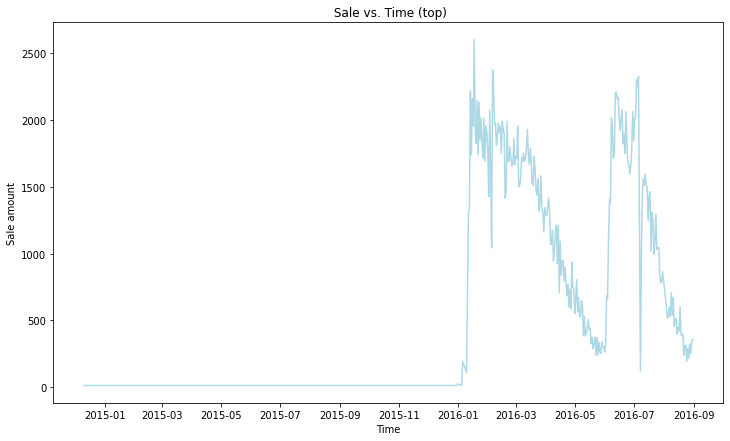

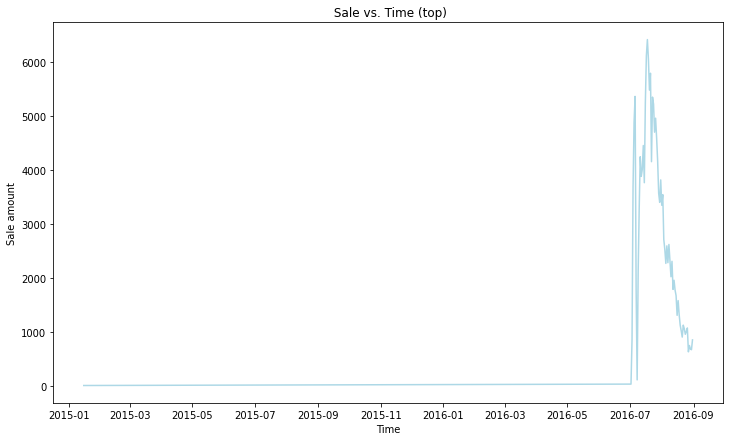

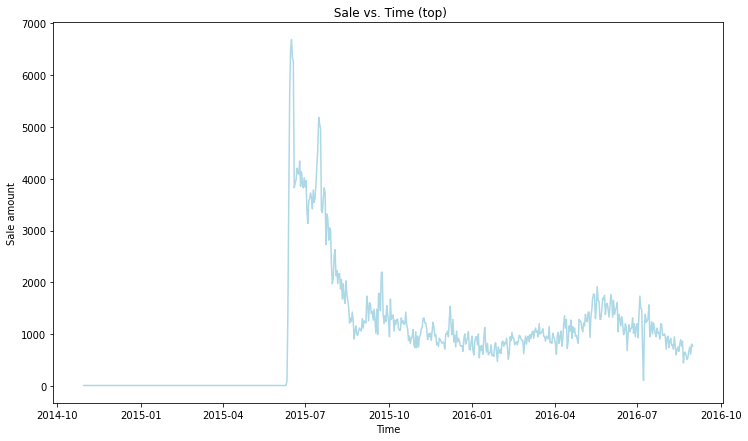

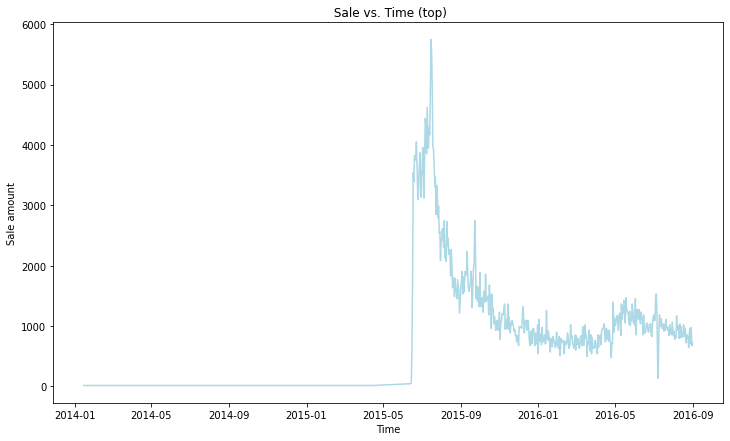

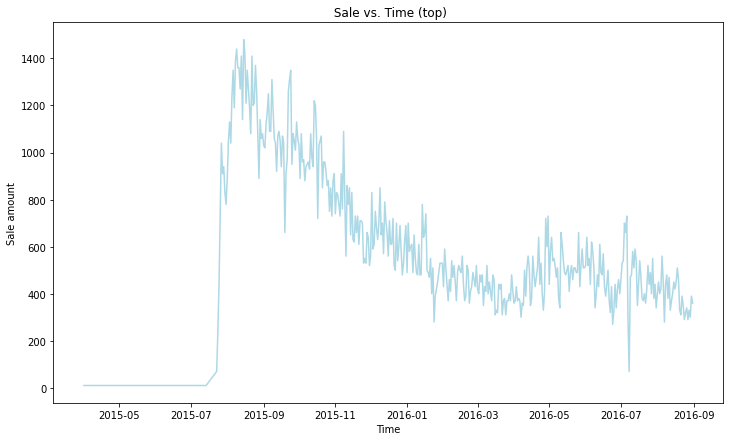

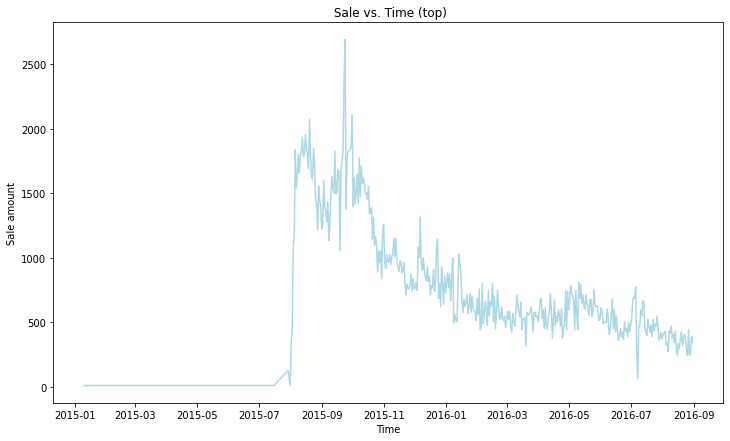

In [18]:
for x in top6models:
    plt.figure(figsize=(12,7))
    plt.title(' Sale vs. Time (top)')
    plt.ylabel('Sale amount')
    plt.xlabel('Time')
    plt.plot(pd.to_datetime(top6[top6.Model == x]['Date']),top6[top6.Model == x]['Count'],color='lightblue') 
